# Supersonic Flow over Flat plate

This notebook examines a two-dimensional, laminar, viscous, supersonic flow past a flat plate with zero angle of attack. The main source of this notebook is $\textit{Computational Fluid Dynamics, The Basics With Applications}$ by John D. Anderson.

## Problem Statement

As incoming supersonic flow meets the leading edge of a thin flat plate with no angle of attack, a viscous and laminar boundary layer develops. The boundary layer remains laminar as long as the Reynolds number remains below the turbulent regime.

This physical phenomenon causes the delvelopment of a shock wave, which is curved due to the presence of the boundary layer, as seen in Figure 1.  Anderson (1995) states that depending on the incoming Mach number, Reynolds number, and plate temperature, the shock layer can contain regions of both viscous and inviscid flows, or it can also be characterized as fully viscous.

Additionally, viscous dissipation of kinetic energy in the shock layer can cause high temperature areas and high heat transfer rates (Anderson, 1995).

<img src="./figures/flow_diagram.png">


#### Figure 1. Supersonic flow over flat plate

## The Governing Equations

The problem can be studied using the time-dependent, two-dimensional Navier-Stokes equations with negligent body forces and volumetric heating (Anderson, 1995). The equations for continuity, and x and y momentum are:

\begin{align}
0=& \frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u ) + \frac{\partial}{\partial y} ( \rho v )   \\
0 =& \frac{\partial}{\partial t}( \rho u ) + \frac{\partial}{\partial x}( \rho u^2 + P - \tau_{xx}) + \frac{\partial}{\partial y} ( \rho uv -\tau_{yx}) \\
0=& \frac{\partial}{\partial t}( \rho v ) + \frac{\partial}{\partial x} ( \rho uv - \tau_{xy} ) + \frac{\partial}{\partial y}  ( \rho v^2 + P -\tau_{yy} ) \\
0=& \frac{\partial}{\partial t}E_{t} + \frac{\partial}{\partial x} \big( (E_{t}+P)u - u \tau_{xx} - v \tau_{xy} + q_{x} \big) + \frac{\partial}{\partial x} \big( (E_{t}+P)v - u \tau_{yx} - v \tau_{yy} + q_{y} \big) \\
\end{align}

In these equations, $E_{t}$ is the sum of kinetic and internal energy per unit volume, and is defined as:

\begin{equation}
E_{t} = \rho \big( e + \frac{V^2}{2} \big) \\
\end{equation}

Additionally, the shear and normal stresses can be expressed in terms of velocity gradiens as:

\begin{align}
\tau_{xy} &= \tau_{yx} = \mu \big( \frac{\partial u }{\partial y} + \frac{\partial v}{\partial x} \big) \\
\tau_{xx} &= \lambda \big( \nabla  \textbf{V} \big) + 2 \mu \frac{\partial u }{\partial x} \\
\tau_{yy} &= \lambda \big( \nabla  \textbf{V} \big) + 2 \mu \frac{\partial v }{\partial y} \\
\end{align}

From Fourier's heat conduction law, the heat flux components are:

\begin{align}
q_{x} &= -k \frac{\partial T }{\partial x} \\
q_{y} &= -k \frac{\partial T }{\partial y}
\end{align}

So far, the system consists of four equations ( 1 through 4 above). The system also contains nine uknowns, which are:

* density, $\rho$ 
* x-velocity, u 
* y-velocity, v 
* velocity magnitude, $|\textbf{V}| $
* pressure, P 
* temperature, T 
* internal energy e 
* viscosity, $\mu$, and 
* thermal conductivity, k

Since there are more unknowns than equations, we need to close the system by adding more equations. Assuming that the air is calorically perfect, we can write an additional five equations for pressure, internal energy, velocity magnitude, viscosity, and thermal conductivity.

1. P = $\rho$RT
2. e = $c_{v}$T
3. $|\textbf{V}| $ = $\sqrt{u^{2}+v^{2}}$
4. $\mu  = \mu_{o} \big(\frac{T}{T_{o}} \big)^{\frac{3}{2}} \bigg( \frac{T_{o} +110}{T + 110} \bigg) \hspace{1em} \text{(Sutherland's law)}$ 
5. Pr = 0.71 = $\frac{\mu c_{p}}{k} \hspace{1em} \text{(Prandtl number)}$

Now that the system of equations is closed, we can proceed to the discretization scheme.

## Discretization 

In this notebook, the governing equations are discretized using the MacCormack finite difference scheme. As we have learned from previous notebooks, the MacCormack scheme is second order accurate in space and time. 

To begin the discretization process, we can express the system of governing equations in vector form:

\begin{equation}
\frac{\partial \textbf{U}}{\partial t} + \frac{\partial \textbf{E}}{\partial x} + \frac{\partial \textbf{F}}{\partial y} = 0,
\end{equation}

where the vectors $\textbf{U}, \textbf{E}$, and $\textbf{F}$ are:

$$\textbf{U} = 
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho v \\
E_{t}
\end{array} \right]$$

$$\textbf{E} = 
\left[ \begin{array}{c}
\rho u\\
\rho u^2 + P - \tau_{xx}\\
\rho uv - \tau_{xy} \\
(E_{t}+P)u - u\tau_{xx} - v\tau_{xy} + q_{x} 
\end{array} \right] $$ 

$$\textbf{F} = 
\left[ \begin{array}{c}
\rho v \\
\rho uv - \tau_{xy}  \\
\rho v^2 + P - \tau_{xy} \\ 
(E_{t}+P)v - u\tau_{xy} - v\tau_{yy} + q_{y}
\end{array} \right] $$ 

Now that we have arranged the properties of mass momentum, energy, and fluxes, we can apply the MacCormack two-step method. It is as follows:

predictor step:

\begin{equation}
U^*_{i,j} = U^n_{i,j} - \frac{\Delta t}{\Delta x} (E^n_{i+1,j}-E^n_{i,j}) - \frac{\Delta t}{\Delta y} (F^n_{i,j+1}-F^n_{i,j})\
\end{equation}

corrector step:

\begin{equation}
U^{n+1}_{i,j} = \frac{1}{2} \big( U^n_{i,j} + U^*_{i,j} - \frac{\Delta t}{\Delta x} (E^*_{i,j} - E^{*}_{i-1,j}) - \frac{\Delta t}{\Delta y}(F^*_{i,j} - F^{*}_{i,j-1}) \big) \ 
\end{equation}



### The issue of maintaing second order accuracy

Anderson (1995) specifies that in order to maintain second order accuracy, the x derivatives appearing in the E flux vector (e.g. in the shear and normal stresses) are differenced in the opposite direction of discretization of $\frac{\partial E}{\partial x}$, while the y derivatives are discretized centrally. Similarly, the y derivatives appearing in F flux are differenced in the opposite direction of discretization of $\frac{\partial F}{\partial y}$, while the x derivatives are discretized centrally.

As an example, consider the predictor step. The E flux vector is differenced forward in space which means that the x derivatives that appear in E will be discretized in a backward direction and the y derivatives will be differenced centrally. Additionally, the F flux vector is differenced in a y-forward direction, which means that the y derivatives that appear in F will be discretized in a backward direction and the x derivatives will be differenced centrally. Then for predictor step we have discretizations as such:

$\begin{align}
\frac{\partial E}{\partial x} \approx \frac{1}{\Delta x} (E_{i+1,j}-E_{i,j}) 
\end{align}$,

and the derivatives appearing in E are discretized like this:

$
\hspace{2.5em} E_{0} = \rho u, \text{(no derivatives)} 
$

$\begin{align}
E_{1} = \rho u^{2} + &P - \\
& \lambda \big( \frac{\textbf{V}_{i,j}-\textbf{V}_{i-1,j} }{\Delta x} + \frac{\textbf{V}_{i,j+1}-\textbf{V}_{i,j-1} }{2 \Delta y} \big) + 2\mu \big( \frac{u_{i,j}-u_{i-1,j}}{\Delta x}  \big)
\end{align}$

$\begin{align}
E_{2} = \rho uv - \mu \big( \frac{u_{i,j+1}-u_{i,j-1}}{2 \Delta y} + \frac{v_{i,j}-v_{i-1,j}}{\Delta x} \big) 
\end{align}$

$\begin{align}
E_{3} = \hspace{0.3em}  &(E_{t}+P)u - \\ & u \bigg( \lambda \big(\frac{ \textbf{V}_{i,j} - \textbf{V}_{i-1,j}  } {\Delta x} + \frac{ \textbf{V}_{i,j+1} - \textbf{V}_{i,j-1}  } {2 \Delta y} \big) + 2\mu \big( \frac{u_{i,j}-u_{i-1,j}}{\Delta x}  \big) \bigg) - \\ & v \bigg(  \mu \big( \frac{u_{i,j+1}-u_{i,j-1}}{2 \Delta y} + \frac{v_{i,j}-v_{i-1,j}}{\Delta x} \big) \big) + \\
&\frac{T_{i,j}-T_{i-1,j}}{\Delta x}
\end{align}$

For the F flux vector, we would have:

$\begin{align}
\frac{\partial F}{\partial y} \approx \frac{1}{\Delta y} (F_{i,j+1}-F_{i,j}) 
\end{align}$,

and the derivatives appearing in F are discretized like this:

$
 \hspace{1em} F_{0} = \rho v, \text{(no derivatives)}
$

$
\hspace{1em} F_{1} = \rho uv - \mu \big( \frac{u_{i,j}-u_{i,j-1}}{\Delta y} + \frac{v_{i+1,j}-v_{i-1,j}}{2 \Delta x} \big) 
$

$
\hspace{1em} F_{2} = \rho v^{2} + P - \mu \big( \frac{u_{i,j}-u_{i,j-1}}{ \Delta y} + \frac{v_{i+1,j}-v_{i-1,j}}{2 \Delta x} \big) 
$

$
\hspace{1em} F_{3} = (E_{t}+P)v - u \mu \big( \frac{u_{i,j}-u_{i,j-1}}{ \Delta y} + \frac{v_{i+1,j}-v_{i-1,j}}{2 \Delta x} \big) - v 2\mu \big( \frac{u_{i,j}-u_{i-1,j}}{\Delta x}  \big) - v \mu \big( \frac{u_{i,j+1}-u_{i,j-1}}{2 \Delta y} + \frac{v_{i,j} + \frac{T_{i,j}-T_{i-1,j}}{\Delta x}
$

This discretization process is also done for the corrector step, which means that we end up with many functions for calculating the shear and normal stress components. In fact, using this process, we end up with eight different functions for normal and shear stresses, and four different functions for heat fluxes.

For further reading on the MacCormack technique, consult the numerical-mooc notebook
["Convection Schemes"](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/03_wave/03_02_convectionSchemes.ipynb), and Anderson (1995), Chapter 6.3.

## Computational Domain

Obviously, we want a computational domain that accurately captures the shock wave. The dimensions of the the computational domain will depend on the specific problem parameters. Anderson (1995) recommends a Reynolds number of about 1000 to relate the incoming freestream velocity and the plate length. A reasonable choice is to make the plate length the length of the computational x-length:

$x_l = L_{plate}$

Using the definition of Reynolds number, and assuming we know the freestream values for density, velocity and viscosity, we can find the computational x-length:

$Re = \frac{\rho u L_{plate}}{\mu} \approx 1000$

Having established the length of the plate as the computational x-length, the computational y-length is established according to the assumption that a length five times the height of the boundary layer at the trailing edge will be sufficient to capture the shock (Anderson, 1995). The height of the boundary layer at the trailing edge, by Blasius calculation:

$\delta = \frac{5 L_{plate}}{\sqrt {Re_L}} $, and

$y_l = 5\delta  $

<img src="./figures/computational_domain.png">


#### Figure 2. Computational Domain

Using this information, we can calculate the x and y spacing between gridpoints:

$\Delta x = \frac {x_l}{n_{x}-1}$, and
$\Delta y = \frac {y_l}{n_{y}-1}$,

where $n_x$ and $n_y$ are the number of gridpoints in the x and y direction, respectively. For this problem, we can follow the general requirements for choosing the number of gridpoints (Anderson, 1995):

$Re_{\Delta x} = \frac{\rho_{i,j} u_{i,j} \Delta x}{\mu_{i,j}}, \hspace{0.5em} Re_{\Delta x} \leq 30-40$, and

$Re_{\Delta y} = \frac{\rho_{i,j} v_{i,j} \Delta x}{\mu_{i,j}}, \hspace{0.5em} Re_{\Delta y} \leq 3-4$.

## Time Stepping Requirements

Because the MacCormack scheme is explicit, we need to employ a stability criterion for the scheme. Using the CFL criterion in Anderson (1995), we can obtain an adaptive time step function:

$ 
\hspace{3em} (\Delta tcfl)_{i,j} = \big( \frac{|u_{i,j}|}{\Delta x} + \frac{|v_{i,j}|}{\Delta y} + a_{i,j} \sqrt{\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}} + 2v^{'}_{i,j} (\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}) \big)^{-1}
$, 

where

$
\hspace{3em} v^{'}_{i,j} = max \big( \frac{ \frac{4}{3} \mu_{i,j} (\gamma \mu_{i,j} / Pr) }{\rho_{i,j}} \big)
$, 

and the time step is

$\hspace{4em} \Delta t = min \big( K(\Delta tcfl)_{i,j} \big)$

K is a fudge factor chosen between 0.5 and 0.8 to ensure stability (Anderson, 1995).

## Problem Setup

Now that we have discussed the governing equations, discretization method, and computational requirements in time and space, we are ready to look at a specific problem.

We choose the freestream conditions:

* Initial values of air at sea level
* Incoming speed of Mach 4

At an incoming velocity of Mach 4, using sea level values for density, viscosity and speed of sound, we can obtain the computational x and y dimensions:

$x_{l} = \frac{1000 \mu}{\rho u} \approx 1x10^{-5} meters$

$y_{l} = 5\delta \approx 8.16x10^{-6} meters$

Although the computational domain is small, it is sufficiently large compared ot the mean free path of air molecules (Anderson, 1995). Similarly, satisfying the spacing requirements, we chose the number of gridpoints:

$n_x$ = $n_y$ = 70

## Initial and  Boundary Conditions

Initially, the values of $\textbf{U}$ are given based on the following initial conditions:

* u = 340.28 $\frac{m}{s}$ x 4 = 1361.12 $\frac{m}{s}$
* v = 0
* T = 288.16 K
* P = 101325 Pa
* $\rho$ $\approx$ 1.225 $\frac{kg}{m^{3}}$

These conditions are initialized everywhere except at the the leading edge and plate surface, where

* u = v = 0, and
* $T_{plate}$ = $T_{wall}$,

where $T_{wall}$ is set equal to initial freestream temperature. Figure 3 below shows the application of boundary conditions. Note that in zone 4 the values for the x and y components of velocity, pressure, and temperature are extrapolated for interior points. Generally this is is accomplished as illustrated by the pseudocode:

$u_{-1,1:-1} = 2u_{-2,1:-1} - u_{-3,1:-1}$.

<img src="./figures/bc.png">


#### Figure 3. Boundary Conditions

## Initial Conditions and Parameters

In [1]:
import numpy
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

#import matplotlib.animation as animation
import pylab 
import types

In [2]:
# Initial Conditions
gamma = 1.4
#Velocity
M = 4.0 #mach number
c_inf = 340.28 #speed of sound m/s
u_inf = M*c_inf
v_inf = 0.0
V_inf = numpy.sqrt(u_inf**2 + v_inf**2 )
#
R = 287 # J/(kg*K)
T_inf = 288.16 #Kelvin
P_inf = 101325 #N/m^2
rho_inf = P_inf/(R*T_inf)
Pr = 0.71 #prandtl no.
dyn_visc = 1.7894e-5 #kg/(m*s)
lmbda = -(2./3.)*dyn_visc # second viscosity coefficient
gamma = 1.4

#specific heat
cv = R/(gamma-1.)
cp = gamma*cv

e_inf = cv*T_inf
#Boundary Conditions
T_wall = T_inf #Kelvin

In [3]:
# Parameters
L = 1e-5 #length of plate

Re = (rho_inf*V_inf*L)/dyn_visc

#Grid
Y = (25*L)/numpy.sqrt(Re)
nx = 70 #number of x grid points
ny = 70 #number of y grid points 

#space steps:
dx = L/(nx-1)
dy = Y/(ny-1)
#x = numpy.linspace(0,L,n)

### Functions

In [5]:
def get_Uinitial(numx, numy, rho_fs, ufs, vfs, Vfs, Tfs, efs, Tw, c_v, R):
    """
    Parameters:
    -----------
    free stream values of:
    density, xvel, yvel, vel magnitude, temperature, 
    internal energy, and wall temperature, and
    constant volume spefific heat
    R - gas constant
    """
    #---------------------------------------------
    U_start = numpy.zeros((4,numx,numy),dtype=float)
    #
    U_start[0,:,1:] = rho_fs 
    U_start[0,0,0] = rho_fs #leading edge
    U_start[0,1:,0] = (rho_fs*R*Tfs)/(R*Tw) #plate
    #
    U_start[1,:,1:] = rho_fs*ufs
    U_start[1,:,0] = 0.0 #no slip on plate including leading edge
    #
    U_start[2,:,:] = rho_fs*vfs
    U_start[2,:,0] = 0.0 #no slip on plate including leading edge
    #
    U_start[3,:,1:] = (efs + 0.5*(Vfs**2))*rho_fs
    U_start[3,1:,0] = (Tw*c_v)*rho_fs #no slip plate
    U_start[3,0,0] = (Tfs*c_v)*rho_fs #no slip plate
    
    return U_start  

In [6]:
def get_Temperature(Uv, numx, numy, Tw, Tfs, c_v):
    """
    Parameters
    ----------------
    Temp - Temeprature in domain
    numx - x grid points
    numy - y grid points
    Tfs - freestream temperature
    Tw - plate temperature
    c_v - constant volume specific heat
    """
    TT = numpy.zeros((numx,numy))
    #
    #interior points
    TT[1:-1,1:-1] = (1/c_v)*\
                    ((Uv[3,1:-1,1:-1]/Uv[0,1:-1,1:-1]) -\
                     0.5*( (Uv[1,1:-1,1:-1]/Uv[0,1:-1,1:-1])**2 +\
                          (Uv[2,1:-1,1:-1]/Uv[0,1:-1,1:-1])**2 ))
    #
    #enforce BCS:
    TT[1:,0] = Tw  #at plate x-line
    TT[0,0] = Tfs #leading edge
    TT[:,-1] = Tfs #at top x-line
    TT[0,1:] = Tfs  #at inflow y-line
    
    #at outflow:
    TT[-1,1:-1] = 2*TT[-2,1:-1] - TT[-3,1:-1] #at outflow y-line, extrapolate
    #
    return TT

In [7]:
def get_visc(Temp, viscfs, Tfs):
    """
    Sutherland's law
    ----------------
    Temp - Temeprature in domain
    viscfs  - freestream viscosity
    Tfs - freestream temperature
    """
    v = numpy.zeros_like(Temp)
    #
    v[:,1:] = viscfs*((Temp[:,1:]/Tfs)**(3./2.))*(Tfs+110.)/(Temp[:,1:]+110)
    v[1:,0] = viscfs*((Temp[1:,0]/Tfs)**(3./2.))*(Tfs+110.)/(Temp[1:,0]+110) #plate
    v[0,0] = viscfs #leading edge
    #
    return v

In [8]:
def get_k(visc, c_p, Prt):
    """
    Parameters
    ----------------
    visc  - viscosity
    c_p - constant pressure specific heat
    Prt - Prandtl number
    """
    #
    kk = numpy.zeros_like(visc)
    kk[:,:] = visc[:,:]*c_p/Prt
    #
    return kk

In [9]:
def get_BC(Uv, Temp, numy, rho_fs, Tw, ufs, c_v, Tfs, R):
    """
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    Temp - Temperature in domain
    numy - y grid points
    rho_fs - free stream density
    Tw - wall temperature
    ufs - freestream x velocity
    c_v - constant volume specific heat
    Tfs - freestream temperature
    R - gas constant
    """
    #
    Ubc = Uv.copy()
    #
    #at outflow, u,v, P, and T are extrapolated, then:
    uout = numpy.zeros((numy-2))
    vout = numpy.zeros((numy-2))
    Pout = numpy.zeros((numy-2))
    #
    uout[:] = 2*Uv[1,-2,1:-1]/Uv[0,-2,1:-1] - Uv[1,-3,1:-1]/Uv[0,-3,1:-1]
    vout[:] =  2*Uv[2,-2,1:-1]/Uv[0,-2,1:-1] - Uv[2,-3,1:-1]/Uv[0,-3,1:-1]
    Pout[:] = 2*Uv[0,-2,1:-1]*R*Temp[-2,1:-1] - Uv[0,-3,1:-1]*R*Temp[-3,1:-1]
    #
    Ubc[0,-1,1:-1] = Pout[:]/(R*Temp[-1,1:-1])
    Ubc[1,-1,1:-1] = Ubc[0,-1,1:-1] * uout[:]
    Ubc[2,-1,1:-1] = Ubc[0,-1,1:-1] * vout[:]
    Ubc[3,-1,1:-1] = Ubc[0,-1,1:-1]*(Temp[-1,1:-1]*cv +\
                                     0.5*(uout[:]**2 + vout[:]**2))
    
    #density
    Ubc[0,0,0] = rho_fs #leading edge
    Ubc[0,1:,0] = (2*R*Uv[0,1:,1]*Temp[1:,1] -\
                   R*Uv[0,1:,2]*Temp[1:,2])/(R*Tw) #density at plate
    Ubc[0,0,1:] = rho_fs #inflow
    Ubc[0,1:,-1] = rho_fs #top
    #
    #x-mom:
    Ubc[1,:,0] = 0.0 #plate and leading edge
    Ubc[1,0,1:] = rho_fs*ufs #inflow
    Ubc[1,1:,-1] = rho_fs*ufs #top
    #y-mom:
    Ubc[2,:,0] = 0.0 #plate and leading edge
    Ubc[2,0,1:] = 0.0 #inflow
    Ubc[2,1:,-1] = 0.0 #top
    #
    #E_total:
    Ubc[3,:,0] = rho_fs*(c_v*Tfs) #plate and leading edge
    Ubc[3,0,1:] = rho_fs*(c_v*Tfs + 0.5*ufs**2) #inflow
    Ubc[3,1:,-1] = rho_fs*(c_v*Tfs + 0.5*ufs**2) #top
    #
    #
    return Ubc

## Predictor Functions

In [10]:
def get_tau_xy_predict(Uv, visc, numx, numy, delx, dely ):
    """
    xy shear stress for E flux predictor step
    x-backward difference, y-central difference
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    """
    tau_xy = numpy.zeros((numx,numy))
    #
    #at plate, exclude leading edge and ouflow point
    # i backward and j forward
    tau_xy[1:-1,0] = visc[1:-1,0]*\
                    ((Uv[1,1:-1,1]/Uv[0,1:-1,1] - Uv[1,1:-1,0]/Uv[0,1:-1,0])/dely +\
                    (Uv[2,1:-1,0]/Uv[0,1:-1,0] - Uv[2,:-2,0]/Uv[0,:-2,0])/delx)
    #
    #at inflow, including leading edge, excluding upper boundary:
    #i and j forward
    tau_xy[0,:-1] = visc[0,:-1]*\
                    ((Uv[1,0,1:]/Uv[0,0,1:] - Uv[1,0,:-1]/Uv[0,0,:-1])/dely +\
                    (Uv[2,1,:-1]/Uv[0,1,:-1] - Uv[2,0,:-1]/Uv[0,0,:-1])/delx)
    #
    #at upper boundary, excluding outflow point and inflow point:
    # i back j back
    tau_xy[1:-1,-1] = visc[1:-1,-1]*\
                      ((Uv[1,1:-1,-1]/Uv[0,1:-1,-1] -\
                        Uv[1,1:-1,-2]/Uv[0,1:-1,-2])/dely +\
                      (Uv[2,1:-1,-1]/Uv[0,1:-1,-1] -\
                       Uv[2,:-2,-1]/Uv[0,:-2,-1])/delx)

    #inner points:
    #i back j central
    tau_xy[1:-1,1:-1] = visc[1:-1,1:-1]*\
                       ( (1/(2*dely))*((Uv[1,1:-1,2:]/Uv[0,1:-1,2:])-\
                                       (Uv[1,1:-1,:-2]/Uv[0,1:-1,:-2])) +\
                       (1/delx)*((Uv[2,1:-1,1:-1]/Uv[0,1:-1,1:-1])-\
                                 (Uv[2,:-2,1:-1]/Uv[0,:-2,1:-1])) )
    #
    #upper inflow
    # i forward j backward
    tau_xy[0,-1] = visc[0,-1]*((Uv[1,0,-1]/Uv[0,0,-1] -\
                                Uv[1,0,-2]/Uv[0,0,-2])/dely +\
                                   (Uv[2,1,-1]/Uv[0,1,-1] -\
                                    Uv[2,0,-1]/Uv[0,0,-1])/delx)
    #
    #upper outflow
    #i back j back
    tau_xy[-1,-1] = visc[-1,-1]*((Uv[1,-1,-1]/Uv[0,-1,-1] -\
                                  Uv[1,-1,-2]/Uv[0,-1,-2])/dely +\
                                   (Uv[2,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[2,-2,-1]/Uv[0,-2,-1])/delx) 
    #
    #outflow:
    #i back j central
    tau_xy[-1,1:-1] = visc[-1,1:-1]*((Uv[1,-1,2:]/Uv[0,-1,2:] -\
                                      Uv[1,-1,:-2]/Uv[0,-1,:-2])/(2*dely) +\
                                   (Uv[2,-1,1:-1]/Uv[0,-1,1:-1] -\
                                    Uv[2,-2,1:-1]/Uv[0,-2,1:-1])/delx)
    #
    return tau_xy

In [11]:
def get_tau_xy_Fpredict(Uv, visc, numx, numy, delx, dely ):
    """
    xy shear stress for F flux predictor step
    
    y-backward difference, x-central difference
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    """
    tau_xy = numpy.zeros((numx,numy))
    #
    #at plate, exclude leading edge and ouflow point
    # i backward and j forward
    tau_xy[1:-1,0] = visc[1:-1,0]*\
                    ((Uv[1,1:-1,1]/Uv[0,1:-1,1] - Uv[1,1:-1,0]/Uv[0,1:-1,0])/dely +\
                    (Uv[2,1:-1,0]/Uv[0,1:-1,0] - Uv[2,:-2,0]/Uv[0,:-2,0])/delx)
    #
    #at inflow, including leading edge, excluding upper boundary:
    #i and j forward
    tau_xy[0,:-1] = visc[0,:-1]*\
                    ((Uv[1,0,1:]/Uv[0,0,1:] - Uv[1,0,:-1]/Uv[0,0,:-1])/dely +\
                    (Uv[2,1,:-1]/Uv[0,1,:-1] - Uv[2,0,:-1]/Uv[0,0,:-1])/delx)
    #
    #at upper boundary, excluding outflow point and inflow point:
    # i back j back
    tau_xy[1:-1,-1] = visc[1:-1,-1]*\
                      ((Uv[1,1:-1,-1]/Uv[0,1:-1,-1] -\
                        Uv[1,1:-1,-2]/Uv[0,1:-1,-2])/dely +\
                      (Uv[2,1:-1,-1]/Uv[0,1:-1,-1] -\
                       Uv[2,:-2,-1]/Uv[0,:-2,-1])/delx)

    #inner points:
    #i central j backward
    tau_xy[1:-1,1:-1] = visc[1:-1,1:-1]*\
                       ( (1/(dely))*((Uv[1,1:-1,1:-1]/Uv[0,1:-1,1:-1])-\
                                       (Uv[1,1:-1,:-2]/Uv[0,1:-1,:-2])) +\
                       (1/(2*delx))*((Uv[2,2:,1:-1]/Uv[0,2:,1:-1])-\
                                 (Uv[2,:-2,1:-1]/Uv[0,:-2,1:-1])) )
    #
    #upper inflow
    # i forward j backward
    tau_xy[0,-1] = visc[0,-1]*((Uv[1,0,-1]/Uv[0,0,-1] -\
                                Uv[1,0,-2]/Uv[0,0,-2])/dely +\
                                   (Uv[2,1,-1]/Uv[0,1,-1] -\
                                    Uv[2,0,-1]/Uv[0,0,-1])/delx)
    #
    #upper outflow
    #i back j back
    tau_xy[-1,-1] = visc[-1,-1]*((Uv[1,-1,-1]/Uv[0,-1,-1] -\
                                  Uv[1,-1,-2]/Uv[0,-1,-2])/dely +\
                                   (Uv[2,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[2,-2,-1]/Uv[0,-2,-1])/delx) 
    #
    #outflow:
    #i back j central
    tau_xy[-1,1:-1] = visc[-1,1:-1]*((Uv[1,-1,2:]/Uv[0,-1,2:] -\
                                      Uv[1,-1,:-2]/Uv[0,-1,:-2])/(2*dely) +\
                                   (Uv[2,-1,1:-1]/Uv[0,-1,1:-1] -\
                                    Uv[2,-2,1:-1]/Uv[0,-2,1:-1])/delx)
    #
    return tau_xy

In [12]:
def get_tau_xx_predict(Uv, visc, numx, numy, delx, dely, lmbda):
    """
    xx normal stress for E flux predictor step
    x-backward, y-central
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    lmbda - second viscosity
    """
    #velocity magnitude:
    V = numpy.zeros_like(Uv)
    V = numpy.abs(numpy.sqrt((Uv[1,:,:]/Uv[0,:,:])**2 + (Uv[2,:,:]/Uv[0,:,:])**2 ) )
    #
    tau_xx = numpy.zeros((numx,numy))
    #
    #at plate, exclude leading edge and ouflow point
    # i backward and j forward
    tau_xx[1:-1,0] = lmbda *\
                    ( (V[1:-1,0]-V[:-2,0])/delx + (V[1:-1,1] - V[1:-1,0])/dely ) +\
                     2*visc[1:-1,0]*( Uv[1,1:-1,0]/Uv[0,1:-1,0] -\
                                     Uv[1,:-2,0]/Uv[0,:-2,0] )/delx
    #
    #at inflow, including leading edge, excluding upper boundary:
    #i and j forward
    tau_xx[0,:-1] = lmbda *\
                   ( (V[1,:-1]-V[0,:-1])/delx + (V[0,1:] - V[0,:-1])/dely ) +\
                     2*visc[0,:-1]*( Uv[1,1,:-1]/Uv[0,1,:-1] -\
                                    Uv[1,0,:-1]/Uv[0,0,:-1] )/delx
    #
    #upper boundary, excluding outflow and inflow points:
    #i and j backward
    tau_xx[1:-1,-1] = lmbda *((V[1:-1,-1]-V[:-2,-1])/delx +\
                              (V[1:-1,-1] - V[1:-1,-2])/dely) +\
                     2*visc[1:-1,-1]*( Uv[1,1:-1,-1]/Uv[0,1:-1,-1] -\
                                      Uv[1,:-2,-1]/Uv[0,:-2,-1] )/delx
    #
    #inner points
    # i backward, j central
    tau_xx[1:-1,1:-1] = lmbda*((V[1:-1,1:-1]-V[:-2,1:-1])/delx +\
                               (V[1:-1,2:]-V[1:-1,:-2])/(2*dely))+\
                       (2*visc[1:-1,1:-1]*(1/delx)*\
                        ((Uv[1,1:-1,1:-1]/Uv[0,1:-1,1:-1])-\
                         (Uv[1,:-2,1:-1]/Uv[0,:-2,1:-1])))
    #upper inflow
    # i forward j backward
    tau_xx[0,-1] = lmbda * ( (V[1,-1]-V[0,-1])/delx + (V[0,-1] - V[0,-2])/dely ) +\
                     2*visc[0,-1]*\
                    ( Uv[1,1,-1]/Uv[0,1,-1] - Uv[1,0,-1]/Uv[0,0,-1] )/delx
    #
    #upper outflow
    # i and j back
    tau_xx[-1,-1] = lmbda * ( (V[-1,-1]-V[-2,-1])/delx +\
                             (V[-1,-1] - V[-1,-2])/dely ) +\
                     2*visc[-1,-1]*( Uv[1,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[1,-2,-1]/Uv[0,-2,-1])/delx
    #
    #outflow:
    #i back j central
    tau_xx[-1,1:-1] = lmbda * ( (V[-1,1:-1]-V[-2,1:-1])/delx +\
                               (V[-1,2:] - V[-1,:-2])/(2*dely) ) +\
                     2*visc[-1,1:-1]*( Uv[1,-1,1:-1]/Uv[0,-1,1:-1] -\
                                      Uv[1,-2,1:-1]/Uv[0,-2,1:-1] )/delx
    #
    return tau_xx

In [13]:
def get_tau_yy_predict(Uv, visc, numx, numy, delx, dely, lmbda):
    """
    yy normal stress for F flux predictor step
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    lmbda - second viscosity
    """
    #velocity magnitude:
    V = numpy.zeros_like(Uv)
    V = numpy.abs(numpy.sqrt((Uv[1,:,:]/Uv[0,:,:])**2 + (Uv[2,:,:]/Uv[0,:,:])**2 ) )
    #
    tau_yy = numpy.zeros((numx,numy))
    #
    #at plate, exclude leading edge and ouflow point
    # i backward and j forward
    tau_yy[1:-1,0] = lmbda * ( (V[1:-1,0]-V[:-2,0])/delx +\
                              (V[1:-1,1] - V[1:-1,0])/dely ) +\
                     2*visc[1:-1,0]*( Uv[2,1:-1,1]/Uv[0,1:-1,1] -\
                                     Uv[2,1:-1,0]/Uv[0,1:-1,0] )/dely
    #
    #at inflow, including leading edge, excluding upper boundary:
    #i and j forward
    tau_yy[0,:-1] = lmbda*((V[1,:-1]-V[0,:-1])/delx + (V[0,1:] - V[0,:-1])/dely ) +\
                     2*visc[0,:-1]*( Uv[2,0,1:]/Uv[0,0,1:] -\
                                    Uv[2,0,:-1]/Uv[0,0,:-1] )/dely
    #
    #upper boundary, excluding outflow and inflow points:
    #i and j backward
    tau_yy[1:-1,-1] = lmbda*((V[1:-1,-1]-V[:-2,-1])/delx +\
                             (V[1:-1,-1] - V[1:-1,-2])/dely ) +\
                     2*visc[1:-1,-1]*( Uv[2,1:-1,-1]/Uv[0,1:-1,-1] -\
                                      Uv[2,1:-1,-2]/Uv[0,1:-1,-2] )/dely
    #
    #inner points
    # i backward, j central
    tau_yy[1:-1,1:-1] = lmbda*((V[1:-1,1:-1]-V[:-2,1:-1])/delx +\
                               (V[1:-1,2:]-V[1:-1,:-2])/(2*dely))+\
                       (2*visc[1:-1,1:-1]*(1/(2*dely))*\
                        ((Uv[2,1:-1,2:]/Uv[0,1:-1,2:])-\
                         (Uv[2,1:-1,:-2]/Uv[0,1:-1,:-2])))
    #
    #upper inflow
    # i forward j backward
    tau_yy[0,-1] =  lmbda*( (V[1,-1]-V[0,-1])/delx + (V[0,-1] - V[0,-2])/dely ) +\
                     2*visc[0,-1]*( Uv[2,0,-1]/Uv[0,0,-1] -\
                                   Uv[2,0,-2]/Uv[0,0,-2] )/dely
    #upper outflow
    # i and j back
    tau_yy[-1,-1] = lmbda*((V[-1,-1]-V[-2,-1])/delx + (V[-1,-1] - V[-1,-2])/dely) +\
                     2*visc[-1,-1]*( Uv[2,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[2,-1,-2]/Uv[0,-1,-2] )/dely 
    #outflow:
    #i back j central
    tau_yy[-1,1:-1] = lmbda*((V[-1,1:-1]-V[-2,1:-1])/delx +\
                             (V[-1,2:]-V[-1,:-2])/(2*dely))+\
                       (2*visc[-1,1:-1]*(1/(2*dely))*\
                        ((Uv[2,-1,2:]/Uv[0,-1,2:])-(Uv[2,-1,:-2]/Uv[0,-1,:-2])))
    return tau_yy

In [14]:
def get_E_flux_predictor(Uv, numx, numy, delx, visc, Temp, kc, txx, txy, R):
    """
    E flux vector for predictor step
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    Temp - temperature in domain,
    kc - thermal conductivity
    txx, txy - stresses
    R - gas constant
    """
    Ev= numpy.zeros_like(Uv)
    qx = numpy.zeros((numx,numy))
    #
    # x heat flux, i backward
    qx[1:,1:-1] = -kc[1:,1:-1]*(Temp[1:,1:-1]-Temp[:-1,1:-1])/delx 
    #
    Ev[0,:,:] = Uv[1,:,:]
    Ev[1,:,:] = (Uv[1,:,:]**2)/Uv[0,:,:] + Uv[0,:,:]*R*Temp[:,:] - txx[:]
    Ev[2,:,:] = Uv[1,:,:]*Uv[2,:,:]/Uv[0,:,:] - txy[:]
    Ev[3,:,:] = (Uv[1,:,:]/Uv[0,:,:])*(Uv[3,:,:] + Uv[0,:,:]*R*Temp[:,:]) -\
                (Uv[1,:,:]/Uv[0,:,:])*txx[:] - (Uv[2,:,:]/Uv[0,:,:])*txy + qx[:,:]
    return Ev

In [15]:
def get_F_flux_predictor(Uv, numx, numy, dely, visc, Temp, kc, txy, tyy, R):
    """
    F flux vector for predictor step
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    Temp - temperature in domain,
    kc - thermal conductivity
    txx, txy - stresses
    R - gas constant
    """
    Fv= numpy.zeros_like(Uv)
    qy = numpy.zeros((numx,numy))
    #
    # y heat flux, j back
    qy[1:-1,1:] = -kc[1:-1,1:]*(Temp[1:-1,1:]-Temp[1:-1,:-1])/dely
    #
    Fv[0,:,:] = Uv[2,:,:]
    Fv[1,:,:] = Uv[1,:,:]*Uv[2,:,:]/Uv[0,:,:] - txy[:]
    Fv[2,:,:] = (Uv[2,:,:]**2)/Uv[0,:,:] + Uv[0,:,:]*R*Temp[:,:] - txy[:]
    Fv[3,:,:] = (Uv[2,:,:]/Uv[0,:,:])*(Uv[3,:,:] + Uv[0,:,:]*R*Temp[:,:]) -\
                (Uv[1,:,:]/Uv[0,:,:])*txy[:] - (Uv[2,:,:]/Uv[0,:,:])*tyy + qy[:,:]
    return Fv

### Adaptive Time step

In [16]:
def get_dt(Uv, numx, numy, delx, dely, visc, Temp, gamma, R, Prt):
    """
    Adaptive time step function
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    Temp - temperature in domain,
    gamma - ratio of specific heats
    R - gas constant
    Prt - Prandtl number
    """
    K= 0.6 #fudge factor for time step to ensure stability
    #
    dt_cfl = numpy.zeros((numx-2,numy-2))
    #
    dt_cfl[:,:] = ((numpy.abs(Uv[1,1:-1,1:-1]/Uv[0,1:-1,1:-1]))/delx +\
                   (numpy.abs(Uv[2,1:-1,1:-1]/Uv[0,1:-1,1:-1]))/dely +\
                   numpy.sqrt(gamma*R*Temp[1:-1,1:-1])*numpy.sqrt( 1/(delx**2) +\
                                                                  1/(dely**2) ) +\
                   2*numpy.max( ((4/3)*visc[1:-1,1:-1]*\
                                 (gamma*visc[1:-1,1:-1]/Prt))/Uv[0,1:-1,1:-1] )*\
                    ( 1/(delx**2) + 1/(dely**2) ) )**(-1)
    #
    delt = numpy.min(K*dt_cfl[:,:])
    #
    return delt

## Corrector Functions

In [17]:
def get_tau_xy_correct(Uv, visc,numx, numy, delx, dely ):
    """
    xy shear stress for E flux corrector step
    x-forward difference, y-central difference
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    """
    tau_xy = numpy.zeros((numx,numy))
    #
    #at plate, exclude leading edge and ouflow point
    # i forward, j forward
    tau_xy[1:-1,0] = visc[1:-1,0]*((Uv[1,1:-1,1]/Uv[0,1:-1,1] -\
                                    Uv[1,1:-1,0]/Uv[0,1:-1,0])/dely +\
                                   (Uv[2,2:,0]/Uv[0,2:,0] -\
                                    Uv[2,1:-1,0]/Uv[0,1:-1,0])/delx)
    #
    #at inflow, including leading edge, excluding upper boundary:
    # i forward, j forward
    tau_xy[0,:-1] = visc[0,:-1]*((Uv[1,0,1:]/Uv[0,0,1:] -\
                                  Uv[1,0,:-1]/Uv[0,0,:-1])/dely +\
                                   (Uv[2,1,:-1]/Uv[0,1,:-1] -\
                                    Uv[2,0,:-1]/Uv[0,0,:-1])/delx)
    #
    #at upper boundary, excluding outflow point and inflow point:
    # i forward, j backward
    tau_xy[1:-1,-1] = visc[1:-1,-1]*((Uv[1,1:-1,-1]/Uv[0,1:-1,-1] -\
                                      Uv[1,1:-1,-2]/Uv[0,1:-1,-2])/dely +\
                                   (Uv[2,2:,-1]/Uv[0,2:,-1] -\
                                    Uv[2,1:-1,-1]/Uv[0,1:-1,-1])/delx)
    #
    #inner points:
    # i forward, j central
    tau_xy[1:-1,1:-1] = visc[1:-1,1:-1]*\
                        ((1/(2*dely))*((Uv[1,1:-1,2:]/Uv[0,1:-1,2:])-\
                                       (Uv[1,1:-1,:-2]/Uv[0,1:-1,:-2])) +\
                        (1/delx)*((Uv[2,2:,1:-1]/Uv[0,2:,1:-1])-\
                                  (Uv[2,1:-1,1:-1]/Uv[0,1:-1,1:-1])) )
    #upper inflow:
    # i forward , j backward
    tau_xy[0,-1] = visc[0,-1]*((Uv[1,0,-1]/Uv[0,0,-1] - Uv[1,0,-2]/Uv[0,0,-2])/dely +\
                               (Uv[2,1,-1]/Uv[0,1,-1] - Uv[2,0,-1]/Uv[0,0,-1])/delx)
    #upper outflow
    ##i back, j back
    tau_xy[-1,-1] = visc[-1,-1]*((Uv[1,-1,-1]/Uv[0,-1,-1] -\
                                  Uv[1,-1,-2]/Uv[0,-1,-2])/dely +\
                                   (Uv[2,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[2,-2,-1]/Uv[0,-2,-1])/delx) 
    #outflow:
    # i back, j central
    tau_xy[-1,1:-1] = visc[-1,1:-1]*((Uv[1,-1,2:]/Uv[0,-1,2:] -\
                                      Uv[1,-1,:-2]/Uv[0,-1,:-2])/(2*dely) +\
                                   (Uv[2,-1,1:-1]/Uv[0,-1,1:-1] -\
                                    Uv[2,-2,1:-1]/Uv[0,1,1:-1])/delx)
    return tau_xy

In [18]:
def get_tau_xy_Fcorrect(Uv, visc,numx, numy, delx, dely ):
    """
    xy shear stress for F flux corrector step
    y-forward difference, x-central difference
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    """
    tau_xy = numpy.zeros((numx,numy))
    #
    #at plate, exclude leading edge and ouflow point
    # i forward, j forward
    tau_xy[1:-1,0] = visc[1:-1,0]*((Uv[1,1:-1,1]/Uv[0,1:-1,1] -\
                                    Uv[1,1:-1,0]/Uv[0,1:-1,0])/dely +\
                                   (Uv[2,2:,0]/Uv[0,2:,0] -\
                                    Uv[2,1:-1,0]/Uv[0,1:-1,0])/delx)
    #
    #at inflow, including leading edge, excluding upper boundary:
    # i forward, j forward
    tau_xy[0,:-1] = visc[0,:-1]*((Uv[1,0,1:]/Uv[0,0,1:] -\
                                  Uv[1,0,:-1]/Uv[0,0,:-1])/dely +\
                                   (Uv[2,1,:-1]/Uv[0,1,:-1] -\
                                    Uv[2,0,:-1]/Uv[0,0,:-1])/delx)
    #
    #at upper boundary, excluding outflow point and inflow point:
    # i forward, j backward
    tau_xy[1:-1,-1] = visc[1:-1,-1]*((Uv[1,1:-1,-1]/Uv[0,1:-1,-1] -\
                                      Uv[1,1:-1,-2]/Uv[0,1:-1,-2])/dely +\
                                   (Uv[2,2:,-1]/Uv[0,2:,-1] -\
                                    Uv[2,1:-1,-1]/Uv[0,1:-1,-1])/delx)
    #
    #inner points:
    # i central, j forward
    tau_xy[1:-1,1:-1] = visc[1:-1,1:-1]*\
                        ((1/dely)*((Uv[1,1:-1,2:]/Uv[0,1:-1,2:])-\
                                       (Uv[1,1:-1,1:-1]/Uv[0,1:-1,1:-1])) +\
                        (1/(2*delx) )*((Uv[2,2:,1:-1]/Uv[0,2:,1:-1])-\
                                  (Uv[2,:-2,1:-1]/Uv[0,:-2,1:-1])) )
    #upper inflow:
    # i forward , j backward
    tau_xy[0,-1] = visc[0,-1]*((Uv[1,0,-1]/Uv[0,0,-1] - Uv[1,0,-2]/Uv[0,0,-2])/dely +\
                               (Uv[2,1,-1]/Uv[0,1,-1] - Uv[2,0,-1]/Uv[0,0,-1])/delx)
    #upper outflow
    ##i back, j back
    tau_xy[-1,-1] = visc[-1,-1]*((Uv[1,-1,-1]/Uv[0,-1,-1] -\
                                  Uv[1,-1,-2]/Uv[0,-1,-2])/dely +\
                                   (Uv[2,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[2,-2,-1]/Uv[0,-2,-1])/delx) 
    #outflow:
    # i back, j central
    tau_xy[-1,1:-1] = visc[-1,1:-1]*((Uv[1,-1,2:]/Uv[0,-1,2:] -\
                                      Uv[1,-1,:-2]/Uv[0,-1,:-2])/(2*dely) +\
                                   (Uv[2,-1,1:-1]/Uv[0,-1,1:-1] -\
                                    Uv[2,-2,1:-1]/Uv[0,1,1:-1])/delx)
    return tau_xy

In [19]:
def get_tau_xx_correct(Uv, visc, numx, numy, delx, dely, lmbda):
    """
    xx normal stress for E flux corrector step
    x-forward, y-central
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    lmbda - second viscosity
    """
    #velocity magnitude:
    V = numpy.zeros_like(Uv)
    V = numpy.abs(numpy.sqrt((Uv[1,:,:]/Uv[0,:,:])**2 + (Uv[2,:,:]/Uv[0,:,:])**2 ) )
    #
    tau_xx = numpy.zeros((numx,numy))
    #at plate, exclude leading edge and ouflow point
    # i forward, j forward
    tau_xx[1:-1,0] = lmbda * ( (V[2:,0]-V[1:-1,0])/delx +\
                              (V[1:-1,1] - V[1:-1,0])/dely ) +\
                     2*visc[1:-1,0]*( Uv[1,2:,0]/Uv[0,2:,0] -\
                                     Uv[1,1:-1,0]/Uv[0,1:-1,0] )/delx
    #at inflow, including leading edge, excluding upper boundary:
    # i forward, j forward
    tau_xx[0,:-1] = lmbda*((V[1,:-1]-V[0,:-1])/delx + (V[0,1:] - V[0,:-1])/dely ) +\
                     2*visc[0,:-1]*( Uv[1,1,:-1]/Uv[0,1,:-1] -\
                                    Uv[1,0,:-1]/Uv[0,0,:-1] )/delx
    #upper boundary, excluding outflow and inflow points:
    # i forward, j backward
    tau_xx[1:-1,-1] = lmbda*((V[2:,-1]-V[1:-1,-1])/delx +\
                             (V[1:-1,-1] - V[1:-1,-2])/dely ) +\
                     2*visc[1:-1,-1]*( Uv[1,2:,-1]/Uv[0,2:,-1] -\
                                      Uv[1,1:-1,-1]/Uv[0,1:-1,-1] )/delx
    #inner points
    # i forward, j central
    tau_xx[1:-1,1:-1] = lmbda*((V[2:,1:-1]-V[1:-1,1:-1])/delx +\
                               (V[1:-1,2:]-V[1:-1,:-2])/(2*dely))+\
                       (2*visc[1:-1,1:-1]*\
                        (1/delx)*((Uv[1,2:,1:-1]/Uv[0,2:,1:-1])-\
                                  (Uv[1,1:-1,1:-1]/Uv[0,1:-1,1:-1])))
    #upper inflow
    # i forward, j backward
    tau_xx[0,-1] = lmbda * ( (V[1,-1]-V[0,-1])/delx +\
                            (V[0,-1] - V[0,-2])/dely ) +\
                     2*visc[0,-1]*( Uv[1,1,-1]/Uv[0,1,-1] -\
                                   Uv[1,0,-1]/Uv[0,0,-1] )/delx
    #upper outflow
    # i and j back
    tau_xx[-1,-1] = lmbda*((V[-1,-1]-V[-2,-1])/delx + (V[-1,-1] - V[-1,-2])/dely) +\
                     2*visc[-1,-1]*( Uv[1,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[1,-2,-1]/Uv[0,-2,-1])/delx
    #outflow:
    #i back j central
    tau_xx[-1,1:-1] = lmbda * ( (V[-1,1:-1]-V[-2,1:-1])/delx +\
                               (V[-1,2:] - V[-1,:-2])/(2*dely) ) +\
                     2*visc[-1,1:-1]*( Uv[1,-1,1:-1]/Uv[0,-1,1:-1] -\
                                      Uv[1,-2,1:-1]/Uv[0,-2,1:-1] )/delx
    return tau_xx

In [20]:
def get_tau_yy_correct(Uv, visc, numx, numy, delx, dely, lmbda):
    """
    yy normal stress for F flux predictor step
    y-forward, x-central
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    lmbda - second viscosity
    """
        #velocity magnitude:
    V = numpy.zeros_like(Uv)
    V = numpy.abs(numpy.sqrt((Uv[1,:,:]/Uv[0,:,:])**2 + (Uv[2,:,:]/Uv[0,:,:])**2))
    #
    tau_yy = numpy.zeros((numx,numy))
    #
    #at plate, exclude leading edge and ouflow point
    tau_yy[1:-1,0] = lmbda*((V[2:,0]-V[1:-1,0])/delx + (V[1:-1,1] - V[1:-1,0])/dely ) +\
                     2*visc[1:-1,0]*( Uv[2,1:-1,1]/Uv[0,1:-1,1] -\
                                     Uv[2,1:-1,0]/Uv[0,1:-1,0] )/dely
    #
    #at inflow, including leading edge, excluding upper boundary:
    tau_yy[0,:-1] = lmbda*((V[1,:-1]-V[0,:-1])/delx + (V[0,1:] - V[0,:-1])/dely ) +\
                     2*visc[0,:-1]*( Uv[2,0,1:]/Uv[0,0,1:] -\
                                    Uv[2,0,:-1]/Uv[0,0,:-1] )/dely
    #
    #upper boundary, excluding outflow and inflow points:
    tau_yy[1:-1,-1] = lmbda * ((V[2:,-1]-V[1:-1,-1])/delx +\
                               (V[1:-1,-1] - V[1:-1,-2])/dely ) +\
                     2*visc[1:-1,-1]*( Uv[2,1:-1,-1]/Uv[0,1:-1,-1] -\
                                      Uv[2,1:-1,-2]/Uv[0,1:-1,-2] )/dely
    #
    #inner points
    #i central, j forward
    tau_yy[1:-1,1:-1] = lmbda*((V[2:,1:-1]-V[:-2,1:-1])/(2*delx) +\
                               (V[1:-1,2:]-V[1:-1,1:-1])/(dely))+\
                       (2*visc[1:-1,1:-1]*\
                        (1/dely)*((Uv[2,1:-1,2:]/Uv[0,1:-1,2:])-\
                                      (Uv[2,1:-1,1:-1]/Uv[0,1:-1,1:-1])))
    #
    tau_yy[0,-1] =  lmbda*((V[1,-1]-V[0,-1])/delx + (V[0,-1] - V[0,-2])/dely ) +\
                     2*visc[0,-1]*( Uv[2,0,-1]/Uv[0,0,-1] -\
                                   Uv[2,0,-2]/Uv[0,0,-2] )/dely
    #
    tau_yy[-1,-1] = lmbda*((V[-1,-1]-V[-2,-1])/delx + (V[-1,-1] - V[-1,-2])/dely) +\
                     2*visc[-1,-1]*( Uv[2,-1,-1]/Uv[0,-1,-1] -\
                                    Uv[2,-1,-2]/Uv[0,-1,-2] )/dely 
    #outflow:
    tau_yy[-1,1:-1] = lmbda*((V[-1,1:-1]-V[-2,1:-1])/delx +\
                             (V[-1,2:]-V[-1,:-2])/(2*dely))-\
                       (2*visc[-1,1:-1]*\
                        (1/(2*dely))*((Uv[2,-1,2:]/Uv[0,-1,2:])-\
                                      (Uv[2,-1,:-2]/Uv[0,-1,:-2])))
    return tau_yy

In [21]:
def get_E_flux_correct(Uv, numx, numy, delx, visc, Temp, kc, txx, txy, R):
    """
    E flux vector for corrector step
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    Temp - temperature in domain,
    kc - thermal conductivity
    txx, txy - stresses
    R - gas constant
    """
    Ev= numpy.zeros_like(Uv)
    qx = numpy.zeros((numx,numy))
    qx[:-1,1:-1] = -kc[:-1,1:-1]*(Temp[1:,1:-1]-Temp[:-1,1:-1])/delx
    #
    Ev[0,:,:] = Uv[1,:,:]
    Ev[1,:,:] = (Uv[1,:,:]**2)/Uv[0,:,:] + Uv[0,:,:]*R*Temp[:,:] - txx[:]
    Ev[2,:,:] = Uv[1,:,:]*Uv[2,:,:]/Uv[0,:,:] - txy[:]
    Ev[3,:,:] = (Uv[1,:,:]/Uv[0,:,:])*(Uv[3,:,:] + Uv[0,:,:]*R*Temp[:,:]) -\
                (Uv[1,:,:]/Uv[0,:,:])*txx[:] - (Uv[2,:,:]/Uv[0,:,:])*txy + qx[:,:]
    return Ev

In [22]:
def get_F_flux_correct(Uv, numx, numy, dely, visc, Temp, kc, txy, tyy, R):
    """
    F flux vector for corrector step
    
    Parameters
    ----------------
    Uv - Vector of density, momentum, and energy values
    visc - viscosity in domain
    numx - x grid points
    numy - y grid points
    delx - x direction spacing
    dely - y direction spacing
    Temp - temperature in domain,
    kc - thermal conductivity
    txx, txy - stresses
    R - gas constant
    """
    Fv= numpy.zeros_like(Uv)
    qy = numpy.zeros((numx,numy))
    qy[1:-1,:-1] = -kc[1:-1,:-1]*(Temp[1:-1,1:]-Temp[1:-1,:-1])/dely
    #
    Fv[0,:,:] = Uv[2,:,:]
    Fv[1,:,:] = Uv[1,:,:]*Uv[2,:,:]/Uv[0,:,:] - txy[:]
    Fv[2,:,:] = (Uv[2,:,:]**2)/Uv[0,:,:] + Uv[0,:,:]*R*Temp[:,:] - txy[:]
    Fv[3,:,:] = (Uv[2,:,:]/Uv[0,:,:])*(Uv[3,:,:] + Uv[0,:,:]*R*Temp[:,:]) -\
                (Uv[1,:,:]/Uv[0,:,:])*txy[:] - (Uv[2,:,:]/Uv[0,:,:])*tyy + qy[:,:]
    return Fv

## Solve

In [23]:
def maccormack(U_init,numt,numx,numy,delx,dely,Tw,Tfs,rho_fs,ufs,c_v,c_p,viscfs,Prt,lmbda,R,gamma):
    """
    Parameters:
    -----------
    """
    Un = numpy.zeros((numt+1,4,numx,numy))
    Un[0,:,:,:] = U_init.copy()
    #
    U = U_init.copy()
    #
    Us = U_init.copy()
    #
    uout = numpy.zeros((numy-2))
    vout = numpy.zeros((numy-2))
    Pout = numpy.zeros((numy-2))
    #
    for t in range(1,numt+1):
        #----
        #get properties to calculate fluxes:
        T = get_Temperature(U, numx, numy, Tw, Tfs, c_v)
        mu = get_visc(T, viscfs, Tfs)
        k = get_k(mu, c_p, Prt)
        #----
        #get shear:
        t_xyE = get_tau_xy_predict(U, mu, numx, numy, delx, dely )
        t_xyF = get_tau_xy_Fpredict(U, mu, numx, numy, delx, dely )
        t_xx = get_tau_xx_predict(U, mu, numx, numy, delx, dely, lmbda)
        t_yy = get_tau_yy_predict(U, mu, numx, numy, delx, dely, lmbda)
        #---
        #calculate fluxes E, F:
        E = get_E_flux_predictor(U, numx, numy, delx, mu, T, k, t_xx, t_xyE, R)
        F = get_F_flux_predictor(U, numx, numy, dely, mu, T, k, t_xyF, t_yy, R)
        #---
        #dt:
        dt = get_dt(U, numx, numy, delx, dely, mu, T, gamma, R, Prt)
        #print(dt)
        #-----
        #Predictor Step:
        Us[:,1:-1,1:-1] = U[:,1:-1,1:-1] -\
                          (dt/delx)*(E[:,2:,1:-1] - E[:,1:-1,1:-1]) -\
                          (dt/dely)*(F[:,1:-1,2:] - F[:,1:-1,1:-1])
        Ustar = get_BC(Us, T, numy, rho_fs, Tw, ufs, c_v, Tfs, R)
        #----
        #update properties:
        T2 = get_Temperature(Ustar, numx, numy, Tw, Tfs, c_v)
        mu2 = get_visc(T2, viscfs, Tfs)
        k2 = get_k(mu2, c_p, Prt)
        #update shear:
        t_xyE2 = get_tau_xy_correct(Ustar,mu2,numx, numy, delx, dely)
        t_xyF2 = get_tau_xy_Fcorrect(Ustar,mu2,numx, numy, delx, dely)
        t_xx2 = get_tau_xx_correct(Ustar, mu2, numx, numy, delx, dely, lmbda)
        t_yy2 = get_tau_yy_correct(Ustar, mu2, numx, numy, delx, dely, lmbda)
        #update fluxes:
        E2 = get_E_flux_correct(Ustar, numx, numy, delx, mu2, T2, k2, t_xx2, t_xyE2, R)
        F2 = get_F_flux_correct(Ustar, numx, numy, dely, mu2, T2, k2, t_xyF2, t_yy2, R)
        #----
        #corrector step:
        Un[t,:,1:-1,1:-1] = 0.5*( U[:,1:-1,1:-1] + Ustar[:,1:-1,1:-1] -\
                               (dt/delx)*(E2[:,1:-1,1:-1]-E2[:,:-2,1:-1]) -\
                               (dt/dely)*(F2[:,1:-1,1:-1]-F2[:,1:-1,:-2] ))

        #Boundary Conditions
        #density
        Un[t,0,0,0] = rho_fs #leading edge
        Un[t,0,1:-1,0] = (2*R*Un[t,0,1:-1,1]*T2[1:-1,1] -\
                        R*Un[t,0,1:-1,2]*T2[1:-1,2])/(R*Tw) #density at plate excluding i=-1
        Un[t,0,0,1:] = rho_fs #inflow
        Un[t,0,1:,-1] = rho_fs #top
        #
        #x-mom:
        Un[t,1,:,0] = 0.0 #plate and leading edge
        Un[t,1,0,1:] = rho_fs*ufs #inflow
        Un[t,1,1:,-1] = rho_inf*ufs #top
        #
        #y-mom:
        Un[t,2,:,0] = 0.0 #plate and leading edge
        Un[t,2,0,1:] = 0.0 #inflow
        Un[t,2,1:,-1] = 0.0 #top
        #
        #E_total:
        Un[t,3,0,0] = rho_fs*(c_v*Tfs) #leading edge
        Un[t,3,1:,0] = Un[t,0,1:,0]*(c_v*Tw) #plate 
        Un[t,3,0,1:] = rho_fs*(c_v*Tfs + 0.5*ufs**2) #inflow
        Un[t,3,1:,-1] = rho_fs*(c_v*Tfs + 0.5*ufs**2) #top
        #
        #at outflow, u,v, P, and T are extrapolated, then:
        #
        uout[:] = 2*Un[t,1,-2,1:-1]/Un[t,0,-2,1:-1] -\
                    Un[t,1,-3,1:-1]/Un[t,0,-3,1:-1]
        vout[:] =  2*Un[t,2,-2,1:-1]/Un[t,0,-2,1:-1] -\
                    Un[t,2,-3,1:-1]/Un[t,0,-3,1:-1]
        Pout[:] = 2*Un[t,0,-2,1:-1]*R*T2[-2,1:-1] -\
                    Un[t,0,-3,1:-1]*R*T2[-3,1:-1]
        #
        Un[t,0,-1,1:-1] = Pout[:]/(R*T2[-1,1:-1])
        Un[t,1,-1,1:-1] = Un[t,0,-1,1:-1] * uout[:]
        Un[t,2,-1,1:-1] = Un[t,0,-1,1:-1] * vout[:]
        Un[t,3,-1,1:-1] = Un[t,0,-1,1:-1]*(T2[-1,1:-1]*c_v +\
                                           0.5*(uout[:]**2 + vout[:]**2))
        #
        Un[t,0,-1,0] = (2*Un[t,0,-1,1]*R*T2[-1,1] - Un[t,0,-1,2]*R*T2[-1,2])/(R*Tw)
        #
        U = Un[t,:,:,:].copy()
         
    return Un

In [24]:
UU = get_Uinitial(nx, ny, rho_inf, u_inf, v_inf, V_inf, T_inf, e_inf, T_wall, cv, R)

In [25]:
US = maccormack(UU,5001,nx,ny,dx,dy,T_wall,\
                T_inf,rho_inf,u_inf,cv,cp,dyn_visc,Pr,lmbda,R,gamma)

## Post-Processing

In [26]:
x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,Y,ny)
mx, my = numpy.meshgrid(x,y)

Here we look at the steady state, converged, solution. Anderson [1995] suggests that the solution is converged once the density at each grid point changes no less than $1*10^{-8}$ between time steps. 

In [27]:
numpy.where((US[2500,0,:,:] - US[2499,0,:,:]) > 1e-8)

(array([], dtype=int64), array([], dtype=int64))

This code shows that the solution is converged. Another subroutine that can be added is a built-in convergence check.

### Pressure Profile at surface (plate)

In [28]:
Uf = US[-1,:,:,:].copy()

In [29]:
Tf = get_Temperature(Uf, nx, ny, T_wall, T_inf, cv)

In [30]:
def get_Pressure(Uv, Temp):
    P = numpy.zeros((nx,ny))
    P[:,:] = Uv[0,:,:]*R*Temp[:,:]
    return P

In [31]:
Pf = get_Pressure(Uf, Tf) #pressure at converged solution

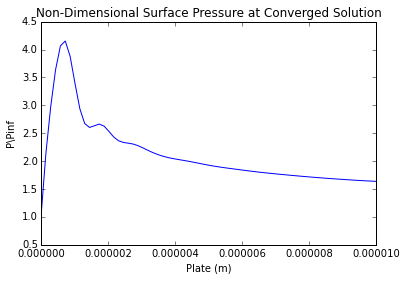

In [32]:
pyplot.plot(x, Pf[:,0]/P_inf )
pyplot.ylabel('P\Pinf ')
pyplot.xlabel('Plate (m)') 
pyplot.title('Non-Dimensional Surface Pressure at Converged Solution');

### Momentum and Energy Contour Plots at Converged Solution

Note that the x-distance is (meters):

In [33]:
L

1e-05

and the y-distance is (meters)

In [34]:
Y

8.189266555235584e-06

Anderson[1995] states that althought we choose a length of plate this small, it is still large enough in comparison to the mean free path of air molecules, and sufficient to capture the shock.

### X-momentum

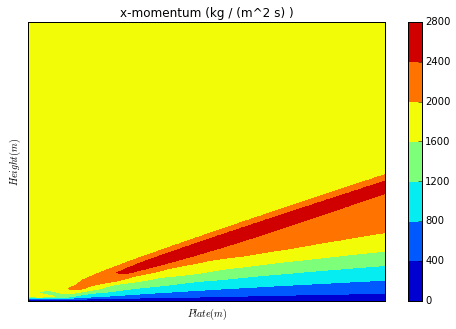

In [35]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(my,mx,US[-1,1,:,:])
pyplot.xticks([]), pyplot.yticks([])
pyplot.xlabel('$Plate (m)$')
pyplot.ylabel('$Height (m)$')
pyplot.colorbar()
pyplot.title('x-momentum (kg / (m^2 s) )');

### Y-momentum

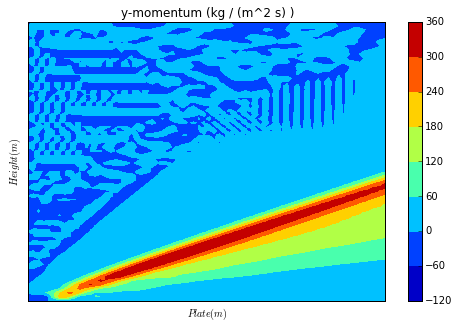

In [36]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(my,mx,US[-1,2,:,:])
pyplot.xticks([]), pyplot.yticks([])
pyplot.xlabel('$Plate (m)$')
pyplot.ylabel('$Height (m)$')
pyplot.colorbar()
pyplot.title('y-momentum (kg / (m^2 s) )');

### Total Energy

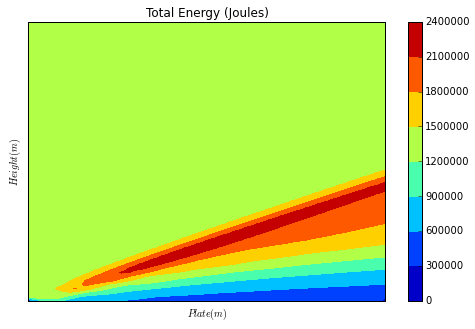

In [37]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(my,mx,US[-1,3,:,:])
pyplot.xticks([]), pyplot.yticks([])
pyplot.xlabel('$Plate (m)$')
pyplot.ylabel('$Height (m)$')
pyplot.colorbar()
pyplot.title('Total Energy (Joules)');

### Outflow Pressure vs Non-dimensional y-distance

In [38]:
?get_k

In [39]:
muf = get_visc(Tf, cp, Pr)

In [40]:
Re_x = numpy.zeros_like(x)
Re_x[1:] = (y[1:]/x[1:])*numpy.sqrt(US[-1,1,-1,1:]*x[1:]/muf[-1,1:])

In [41]:
yp =numpy.zeros_like(y)
yp[1:] = (y[1:]/x[1:])*numpy.sqrt(Re_x[1:])

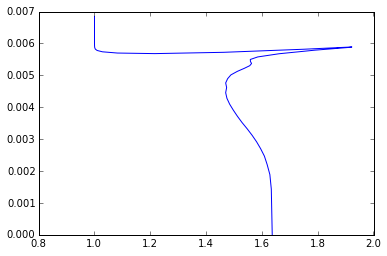

In [42]:
pyplot.plot(Pf[-1,:]/P_inf, yp);

### Outflow Temperature vs Non-dimensional y-distance

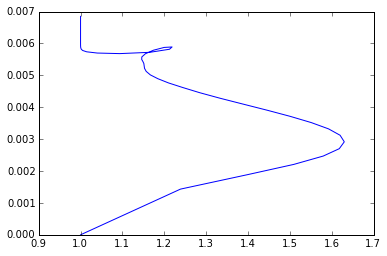

In [43]:
pyplot.plot(Tf[-1,:]/T_inf, yp);

### Outflow Velocity vs Non-dimensional y-distance

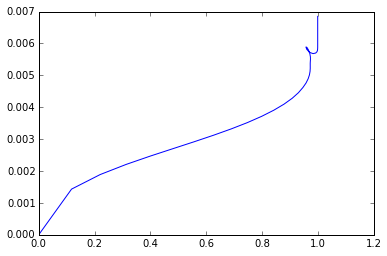

In [44]:
pyplot.plot(US[-1,1,-1,:]/(u_inf*US[-1,0,-1,:]), yp);

## Animate!

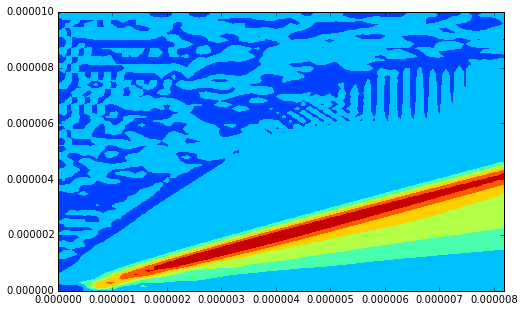

In [45]:
fig = pyplot.figure(figsize=(8,5))

ims = []

for i in range(0,2000,10):
    im = pyplot.contourf(my,mx,US[i,2,:,:])
    def setvisible(self,vis):
        for c in self.collections: c.set_visible(vis)
    im.set_visible = types.MethodType(setvisible,im)
    im.axes = pylab.gca()
    im.figure=fig
    #pyplot.colorbar()
    ims.append([im])


In [52]:
# #ani = animation.FuncAnimation(fig,ims)
ani = animation.ArtistAnimation(fig, ims)
#display_animation(ani, default_mode='once')

#ani.save('ymom.mpeg')

In [47]:
from IPython.core.display import HTML
css_file = '/Users/Luis/numerical-mooc/styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())